# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city.replace(" ","+") 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | nova sintra
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | malanje
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | choma
Processing Record 13 of Set 1 | gadzhiyevo
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | raduzhny
Processing Record 18 of Set 1 | urumqi
Processing Record 19 of Set 1 | la ronge
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | kodiak
Processing

Processing Record 43 of Set 4 | tulagi
Processing Record 44 of Set 4 | buala
Processing Record 45 of Set 4 | constitucion
Processing Record 46 of Set 4 | stanley
Processing Record 47 of Set 4 | viqueque
Processing Record 48 of Set 4 | ribeira grande
Processing Record 49 of Set 4 | soe
Processing Record 0 of Set 5 | la gi
Processing Record 1 of Set 5 | mejit
Processing Record 2 of Set 5 | san antonio de pale
Processing Record 3 of Set 5 | nogliki
Processing Record 4 of Set 5 | hardys memories of africa
City not found. Skipping...
Processing Record 5 of Set 5 | murun-kuren
Processing Record 6 of Set 5 | taulaga
Processing Record 7 of Set 5 | salekhard
Processing Record 8 of Set 5 | uturoa
Processing Record 9 of Set 5 | grand falls-windsor
Processing Record 10 of Set 5 | south venice
Processing Record 11 of Set 5 | ilulissat
Processing Record 12 of Set 5 | paghman
Processing Record 13 of Set 5 | palu
Processing Record 14 of Set 5 | dudinka
Processing Record 15 of Set 5 | sao vicente
Proce

Processing Record 35 of Set 8 | orsa
Processing Record 36 of Set 8 | tangalle
Processing Record 37 of Set 8 | port saint john's
Processing Record 38 of Set 8 | aksu
Processing Record 39 of Set 8 | lijiang
Processing Record 40 of Set 8 | zofingen
Processing Record 41 of Set 8 | kambia
Processing Record 42 of Set 8 | chiknayakanhalli
Processing Record 43 of Set 8 | kudahuvadhoo
Processing Record 44 of Set 8 | marathon
Processing Record 45 of Set 8 | thunder bay
Processing Record 46 of Set 8 | pitimbu
Processing Record 47 of Set 8 | san patricio
Processing Record 48 of Set 8 | pielavesi
Processing Record 49 of Set 8 | zhlobin
Processing Record 0 of Set 9 | isla mujeres
Processing Record 1 of Set 9 | kabo
Processing Record 2 of Set 9 | ndjole
Processing Record 3 of Set 9 | puerto carreno
Processing Record 4 of Set 9 | shangri-la
City not found. Skipping...
Processing Record 5 of Set 9 | sungai penuh
Processing Record 6 of Set 9 | rio gallegos
Processing Record 7 of Set 9 | kerikeri
Process

Processing Record 23 of Set 12 | aswan
Processing Record 24 of Set 12 | coquimbo
Processing Record 25 of Set 12 | ngorongoro
Processing Record 26 of Set 12 | ingeniero jacobacci
Processing Record 27 of Set 12 | tabuk
Processing Record 28 of Set 12 | kachug
Processing Record 29 of Set 12 | ca mau
Processing Record 30 of Set 12 | nagato
Processing Record 31 of Set 12 | martapura
Processing Record 32 of Set 12 | sarykemer
Processing Record 33 of Set 12 | fort mcmurray
Processing Record 34 of Set 12 | kulia village
City not found. Skipping...
Processing Record 35 of Set 12 | taltal
Processing Record 36 of Set 12 | harnosand
Processing Record 37 of Set 12 | pacasmayo
Processing Record 38 of Set 12 | jiwani
Processing Record 39 of Set 12 | kloulklubed
Processing Record 40 of Set 12 | flying fish cove
Processing Record 41 of Set 12 | yuxi
Processing Record 42 of Set 12 | aykhal
Processing Record 43 of Set 12 | chui
Processing Record 44 of Set 12 | spearfish
Processing Record 45 of Set 12 | lo

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,52.83,75,100,8.01,NZ,1701285257
1,ust-nera,64.5667,143.2000,-14.58,99,74,5.91,RU,1701285111
2,nova sintra,14.8667,-24.7167,71.04,71,2,13.33,CV,1701285259
3,west island,-12.1568,96.8225,76.98,78,38,6.91,CC,1701285260
4,albany,42.6001,-73.9662,34.34,55,100,1.99,US,1701285237


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,52.83,75,100,8.01,NZ,1701285257
1,ust-nera,64.5667,143.2000,-14.58,99,74,5.91,RU,1701285111
2,nova sintra,14.8667,-24.7167,71.04,71,2,13.33,CV,1701285259
3,west island,-12.1568,96.8225,76.98,78,38,6.91,CC,1701285260
4,albany,42.6001,-73.9662,34.34,55,100,1.99,US,1701285237


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

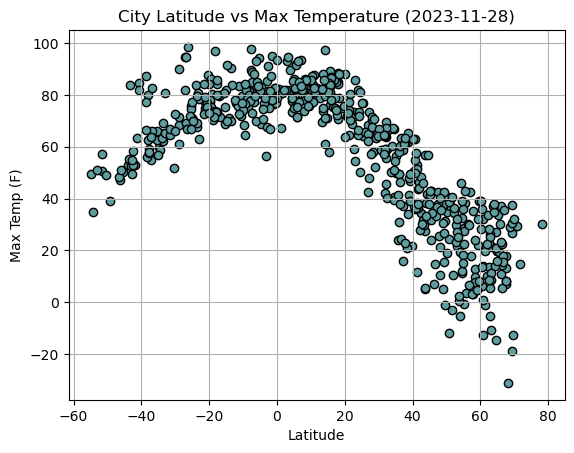

In [45]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker='o', facecolors="cadetblue", edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude vs Max Temperature (2023-11-28)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

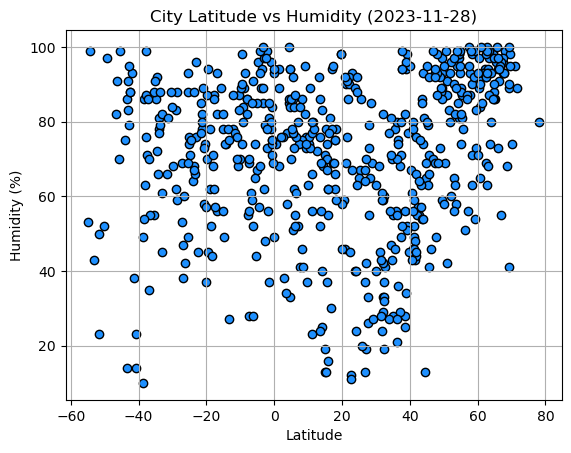

In [46]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, marker = 'o',facecolors = "dodgerblue",edgecolors='black')


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-11-28)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

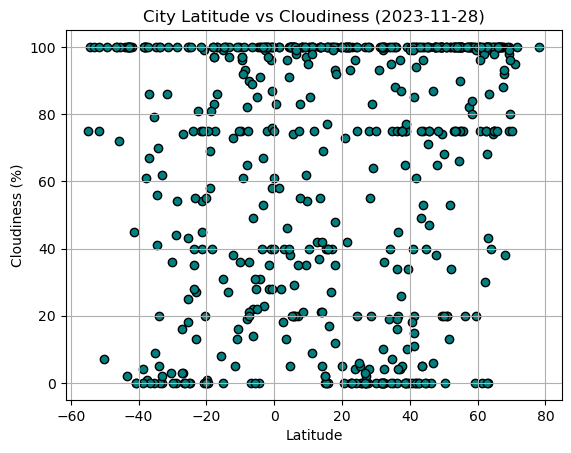

In [47]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker = 'o', facecolors = "teal", edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-11-28)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

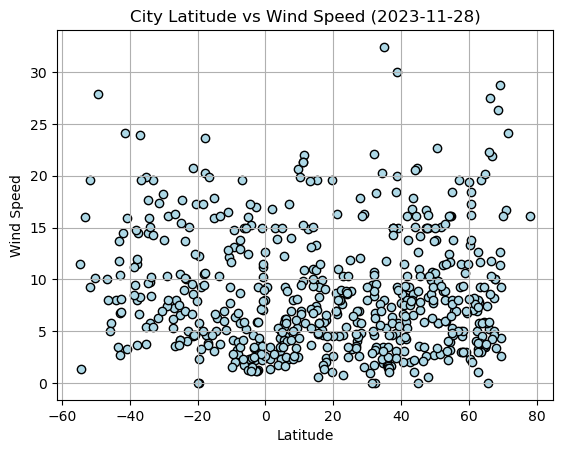

In [48]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"] 
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker = 'o', facecolors = "lightblue", edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed (2023-11-28)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def city_weather_linregress(df_name,x_axis,y_axis):
    slope, intercept, r_value, p_value, std_err = linregress(x_axis,y_axis)
    
#Line equation
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    plt.annotate(line_eq,(max(x_axis),min(y_axis)),fontsize=12,color='red')
    
    regress_values = x_axis*slope + intercept
    plt.plot(x_axis,regress_values,"r-")
    
    plt.scatter(x_axis,y_axis,marker = 'o',facecolors = 'dodgerblue',edgecolors='black')
    
    #Output r
    print(f'The r value is: {r_value}')

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ust-nera,64.5667,143.2000,-14.58,99,74,5.91,RU,1701285111
2,nova sintra,14.8667,-24.7167,71.04,71,2,13.33,CV,1701285259
4,albany,42.6001,-73.9662,34.34,55,100,1.99,US,1701285237
5,bilibino,68.0546,166.4372,-31.16,99,38,3.36,RU,1701285261
6,whitehorse,60.7161,-135.0538,14.09,84,75,17.27,CA,1701285263


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat']<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,52.83,75,100,8.01,NZ,1701285257
3,west island,-12.1568,96.8225,76.98,78,38,6.91,CC,1701285260
7,adamstown,-25.0660,-130.1015,71.13,76,100,6.58,PN,1701285264
8,malanje,-9.5402,16.3410,64.69,98,97,4.16,AO,1701285264
10,choma,-16.8065,26.9531,71.55,56,86,3.87,ZM,1701285266


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8870692838451172


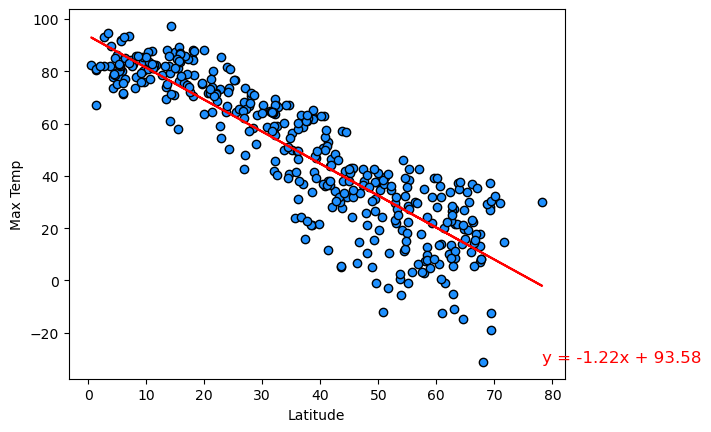

In [68]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Run Calculate with given values
city_weather_linregress(northern_hemi_df,x_values,y_values)

#Plot 
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.show()

The r value is: 0.6717352473164422


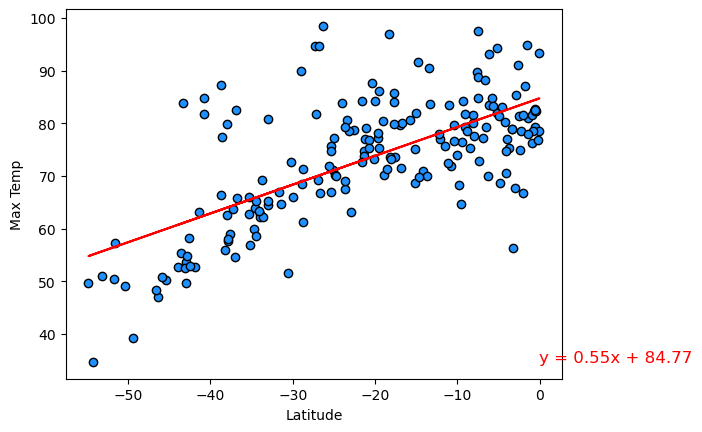

In [70]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Run Calculate with given values
city_weather_linregress(southern_hemi_df,x_values,y_values)

#Plot 
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** When looking at the Two plots one MUST note the axis. In the above axis (northern hemisphere) the distance from equator grows as you move right. In the latter plot (southern hemisphere) the distance from the equator is shrinking. Both are starting that as you near the equator your max temperature is increasing.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.3425357380708796


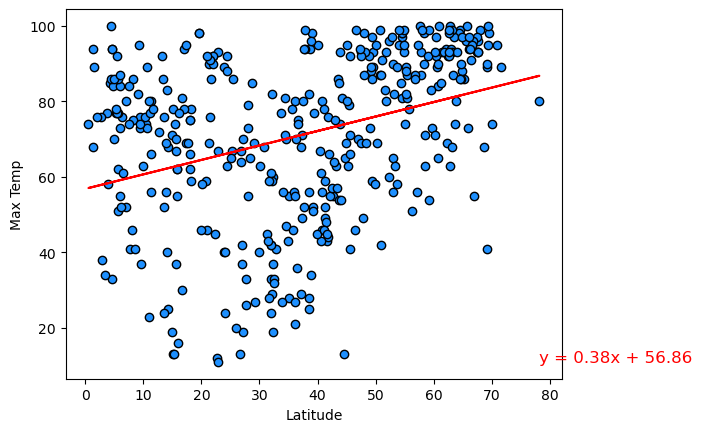

In [71]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Run Calculate with given values
city_weather_linregress(northern_hemi_df,x_values,y_values)

#Plot 
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

The r value is: 0.15050524585418204


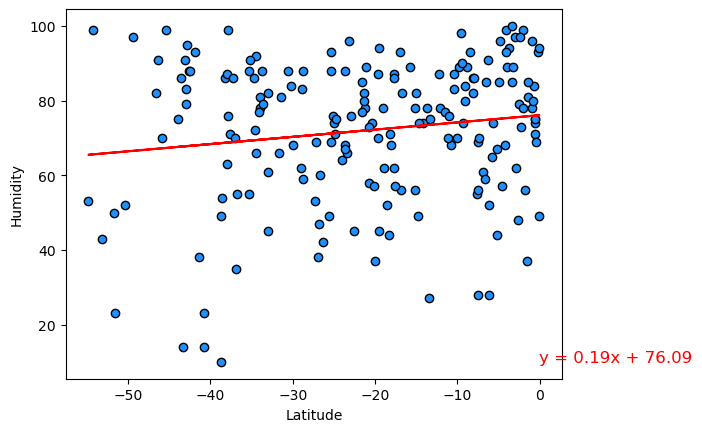

In [72]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Run Calculate with given values
city_weather_linregress(southern_hemi_df,x_values,y_values)

#Plot 
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** Based on the data points and city selected it can be assumed that as you travel farther north there is little to no correlation with humidity. We know that with the low R-Value you are at a nearly random choice of humidity to latitude location ratio in the southern and a very small, nearly negliable correlation in the northern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.21098966664149466


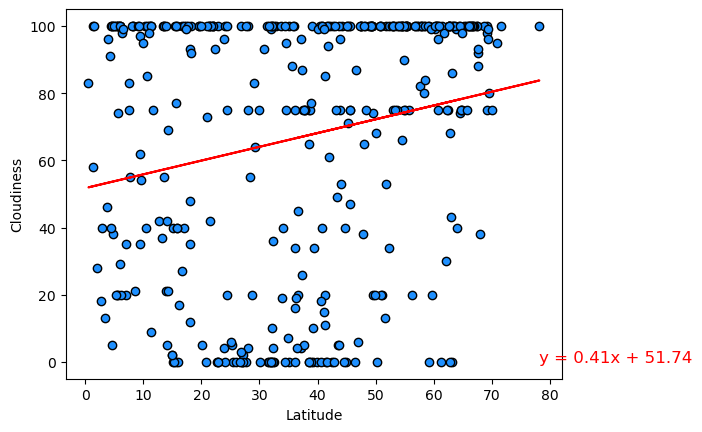

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Run Calculate with given values
city_weather_linregress(northern_hemi_df,x_values,y_values)

#Plot 
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

The r value is: 0.016627414047001653


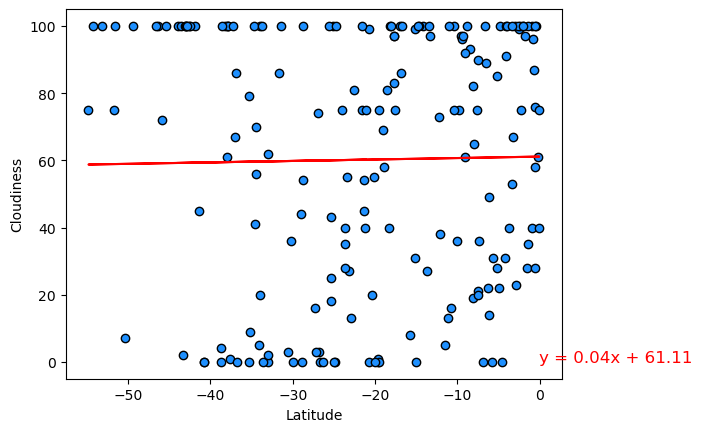

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Run Calculate with given values
city_weather_linregress(southern_hemi_df,x_values,y_values)

#Plot 
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** There can be seen a slight correlation fo cloudiness as you travel away from the equator in the north hemisphere. However there is a negliable correlation in the southern hemisphere for distance from the equator and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.13971288122590436


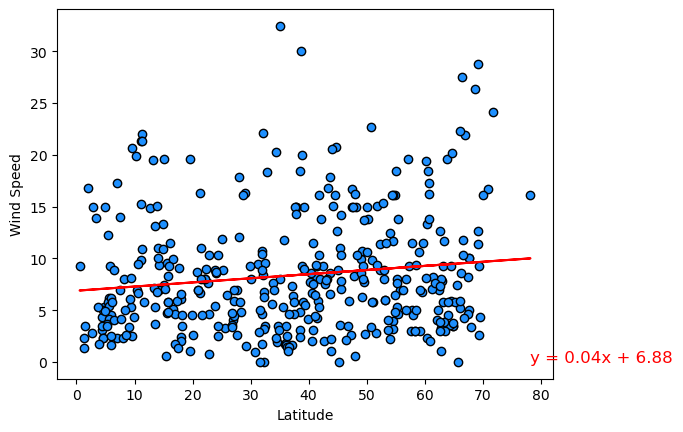

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Run Calculate with given values
city_weather_linregress(northern_hemi_df,x_values,y_values)

#Plot 
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

The r value is: -0.26599723205854203


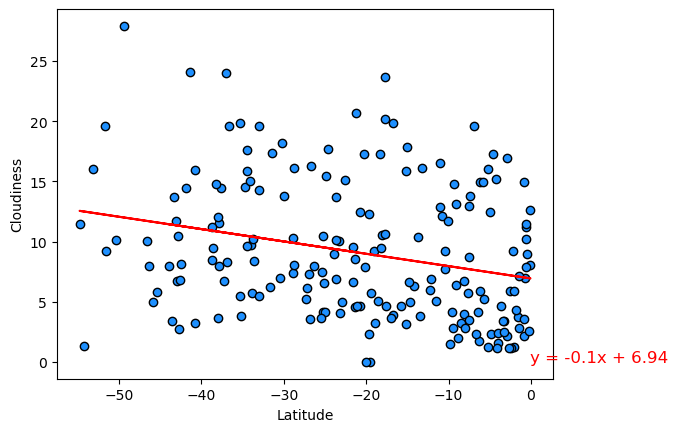

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Run Calculate with given values
city_weather_linregress(southern_hemi_df,x_values,y_values)

#Plot 
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** With the given cities and the data from both the northern and southern hemisphere there is no definative correlation between distance from the equator and the wind speed in the city. 